#Prepare A Classification Model Using SVM For Salary Data
**Data Description**   
       
age : age of a person                  
workclass : A work class is a grouping of work                  
education : Education of an individuals               
maritalstatus : Marital status of an individulas                
occupation : occupation of an individuals                  
relationship :             
race : Race of an Individual               
sex : Gender of an Individual                    
capitalgain : profit received from the sale of an investment                   
capitalloss : A decrease in the value of a capital asset                
hoursperweek : number of hours work per week                   
native : Native of an individual                 
Salary : salary of an individual                    

In [2]:
import pandas as pd
sd_test = pd.read_csv('/content/SalaryData_Test(1).csv')

In [3]:
sd_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [4]:
import pandas as pd
sd_train = pd.read_csv('/content/SalaryData_Train(1).csv')


In [5]:
sd_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
sd_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [7]:
sd_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [8]:
sd_test.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [9]:
sd_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [10]:
sd_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [11]:
sd_train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

# Data transformation (Data Encoding)

In [12]:
# For train

mappings = {}
for i in dict(sd_train.dtypes):
 if dict(sd_train.dtypes)[i] == 'O':
  mappings[i] = dict(zip(sd_train[i].unique(), range(len(sd_train[i].unique()))))
  sd_train[i] = sd_train[i].map(lambda x: mappings[i][x])


In [13]:

# For test
mappingst = {}
for i in dict(sd_test.dtypes):
 if dict(sd_test.dtypes)[i] == 'O':
  mappings[i] = dict(zip(sd_test[i].unique(), range(len(sd_test[i].unique()))))
  sd_test[i] = sd_test[i].map(lambda x: mappings[i][x])

In [14]:
sd_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,0,0,7,0,0,0,0,0,0,0,40,0,0
1,38,0,1,9,1,1,1,1,0,0,0,50,0,0
2,28,1,2,12,1,2,1,1,0,0,0,40,0,1
3,44,0,3,10,1,0,1,0,0,7688,0,40,0,1
4,34,0,4,6,0,3,2,1,0,0,0,30,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,0,7,13,0,4,0,1,0,0,0,40,0,0
15056,39,0,7,13,4,4,2,1,1,0,0,36,0,0
15057,38,0,7,13,1,4,1,1,0,0,0,50,0,0
15058,44,0,7,13,4,6,0,4,0,5455,0,40,0,0


In [15]:
sd_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,0,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,0,13,1,1,1,0,0,0,0,13,0,0
2,38,2,1,9,2,2,0,0,0,0,0,40,0,0
3,53,2,2,7,1,2,1,1,0,0,0,40,0,0
4,28,2,0,13,1,3,2,1,1,0,0,40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,6,12,1,9,2,0,1,0,0,38,0,0
30157,40,2,1,9,1,8,1,0,0,0,0,40,0,1
30158,58,2,1,9,6,0,4,0,1,0,0,40,0,0
30159,22,2,1,9,0,0,3,0,0,0,0,20,0,0


#EDA
 **Exploratory data analysis**

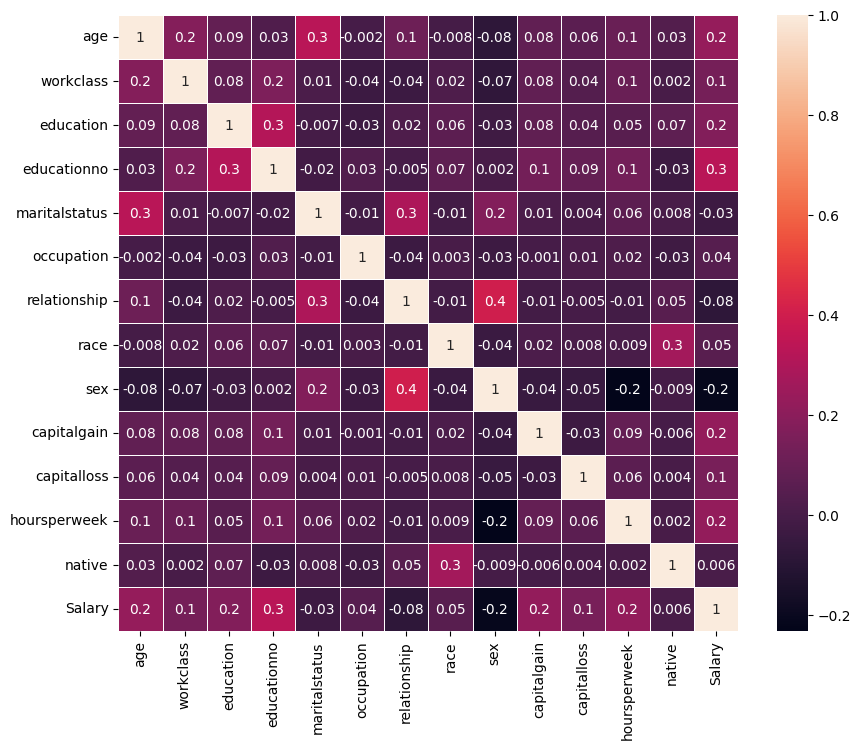

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# For test
plt.figure(figsize = (10, 8))
corr = sd_test.corr()

sns.heatmap(data = corr, annot = True, fmt = '.1g', linewidth = 0.5)
plt.show()

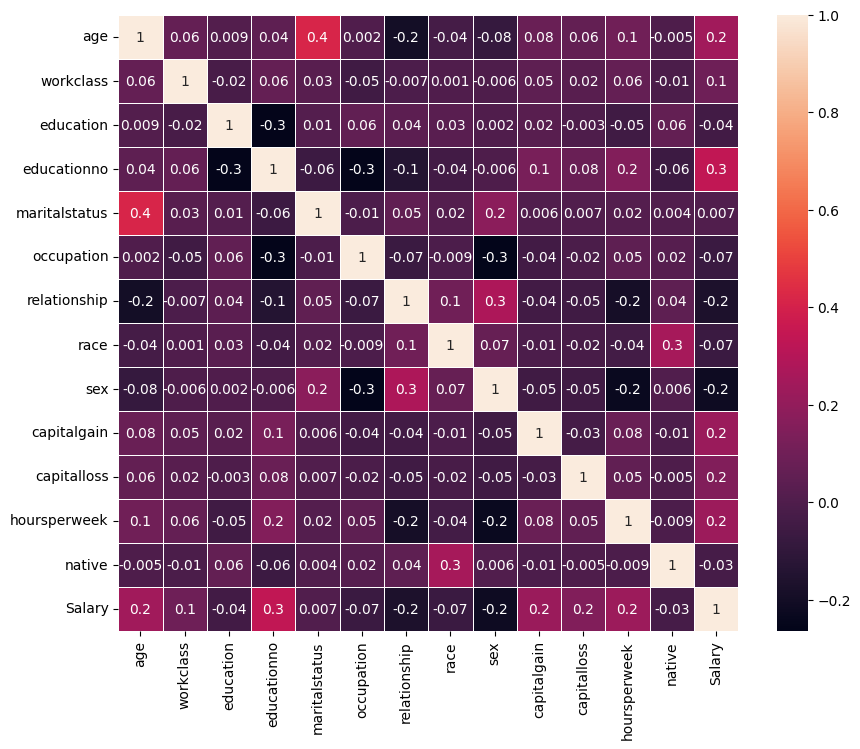

In [17]:

#For train
plt.figure(figsize = (10, 8))
corr = sd_train.corr()

sns.heatmap(data = corr, annot = True, fmt = '.1g', linewidth = 0.5)
plt.show()

# Format the plot background and scatter plots for all the variables


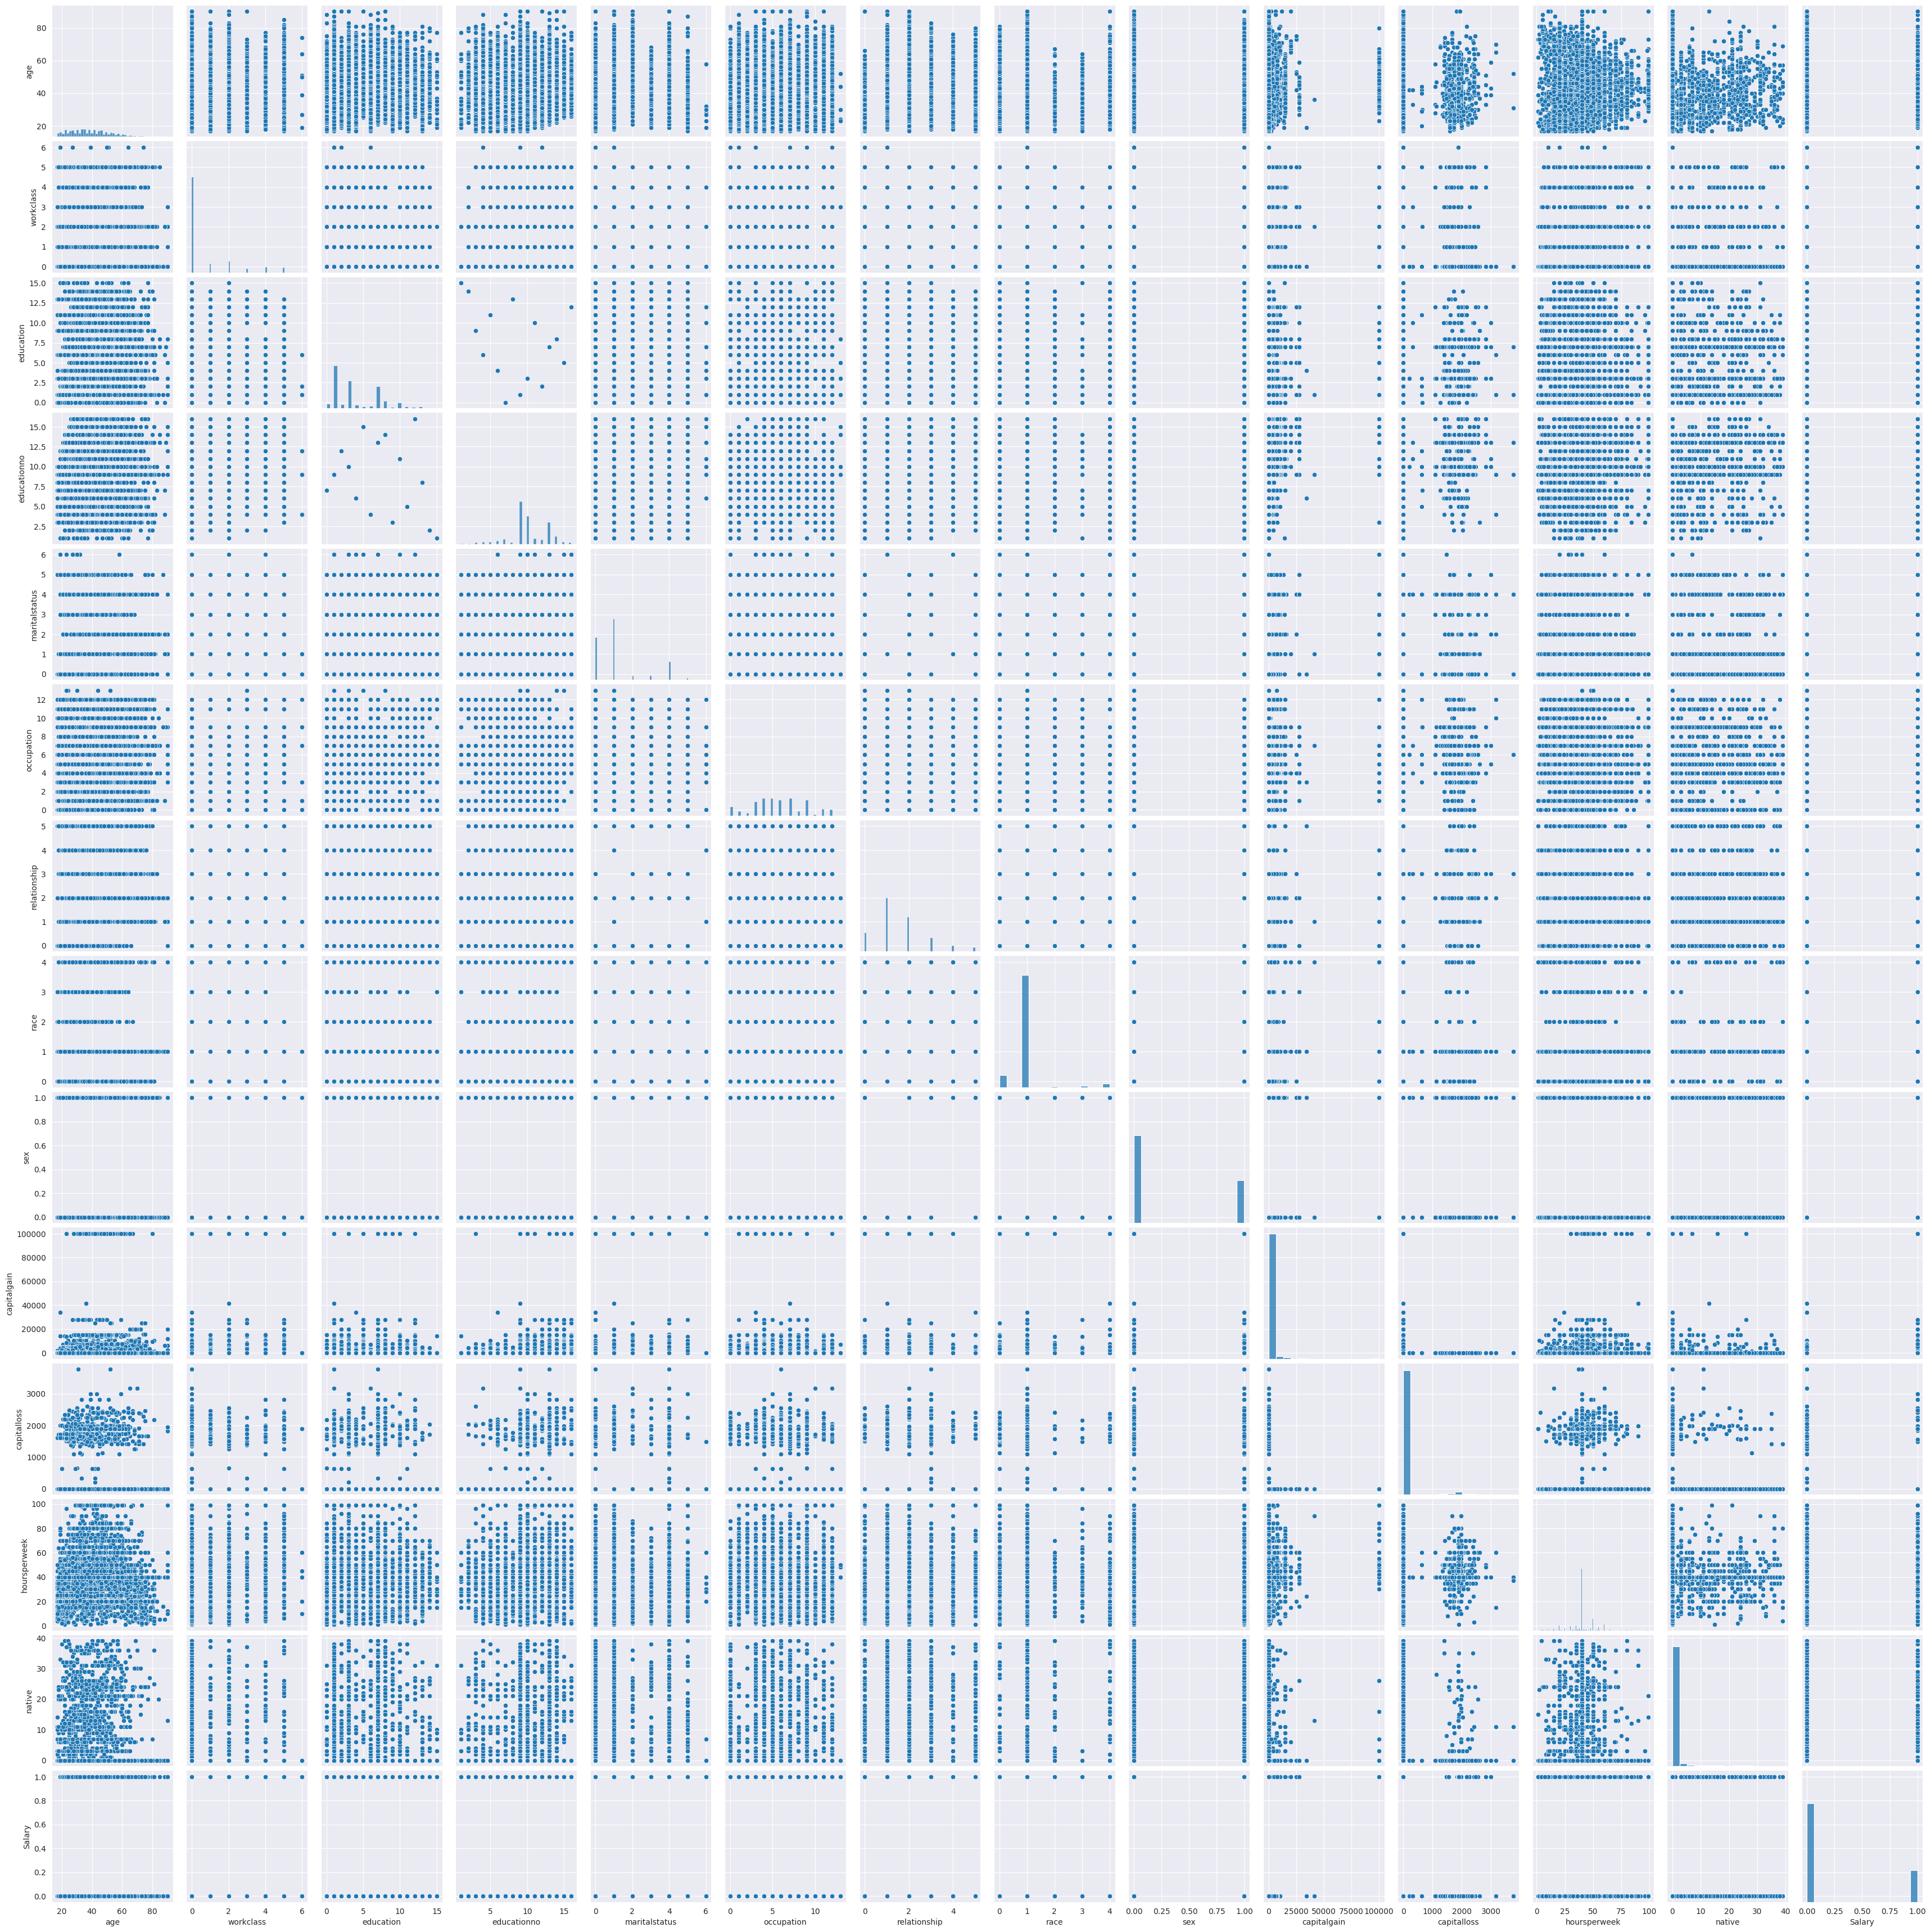

In [18]:
sns.set_style(style="darkgrid")
sns.pairplot(sd_test)

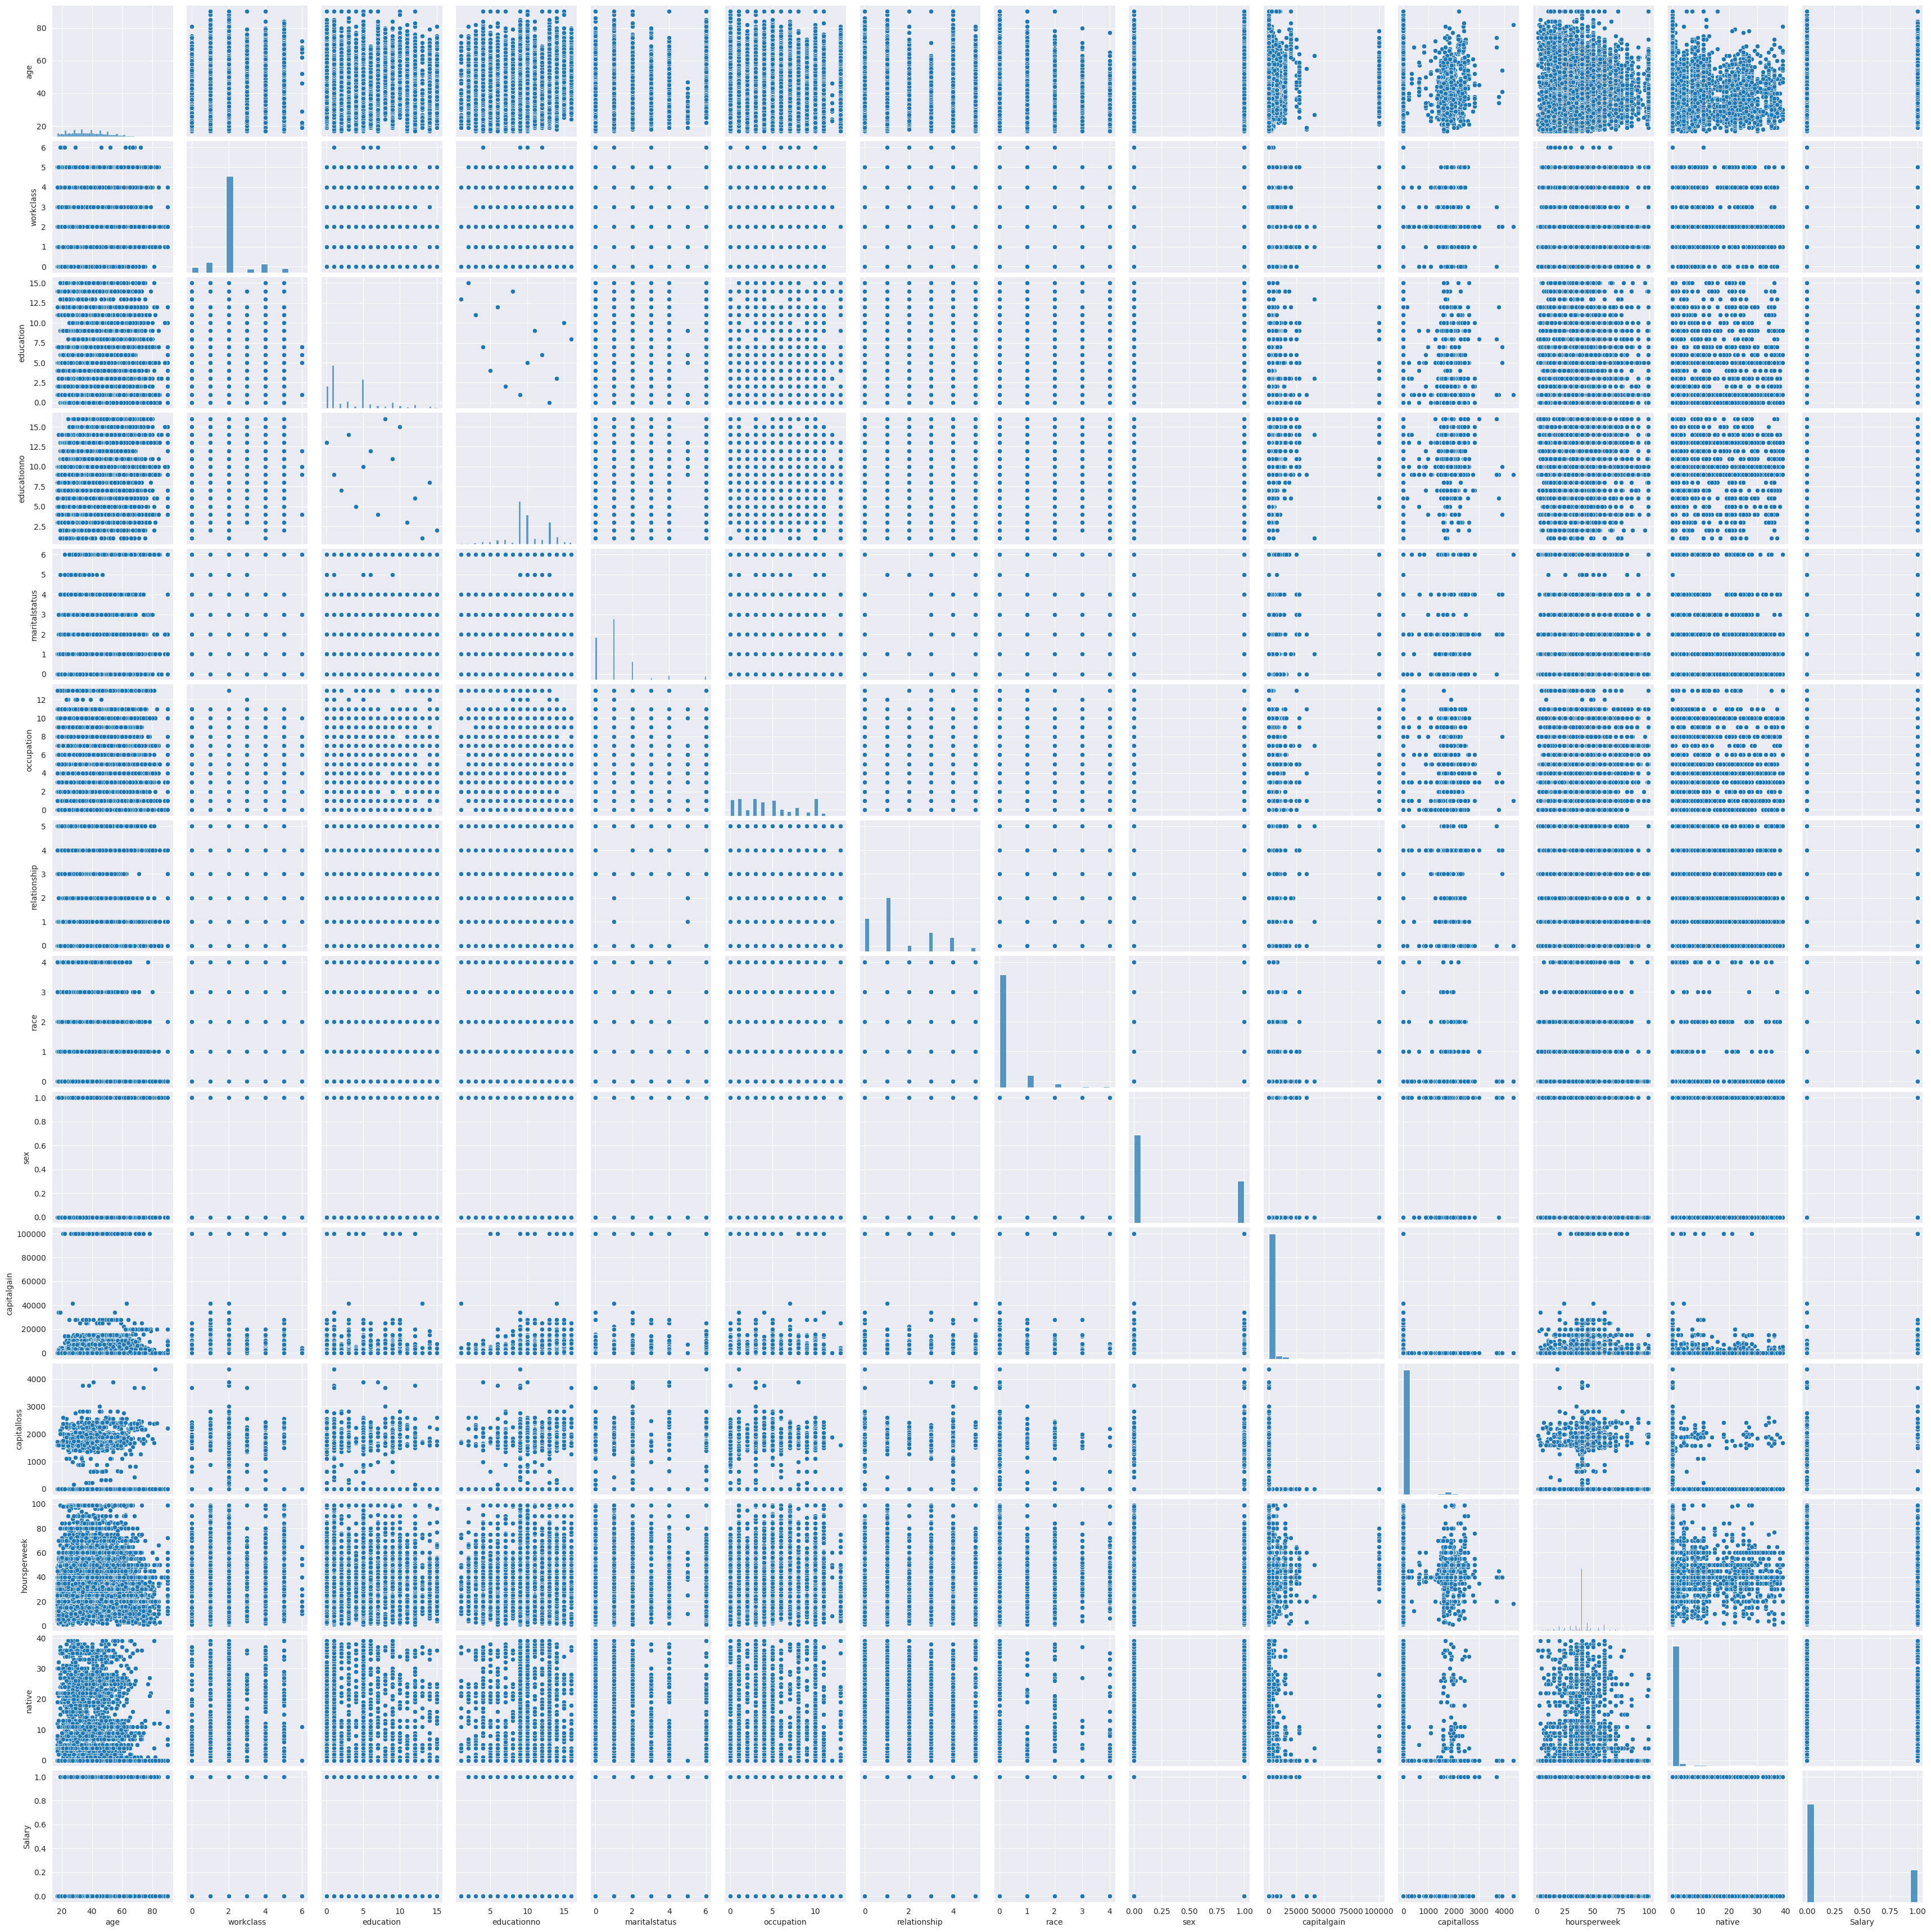

In [19]:
sns.set_style("darkgrid")
sns.pairplot(sd_train)

In [20]:
sd_train['Salary']

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: Salary, Length: 30161, dtype: int64

**Split the variables X and Y**

In [21]:
y_train = sd_train['Salary']
x_train = sd_train.drop('Salary', axis = 1)

y_test = sd_test["Salary"]
x_test = sd_test.drop('Salary',axis = 1)

In [22]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((30161, 13), (30161,), (15060, 13), (15060,))

In [23]:

from sklearn.svm import SVC
svc = SVC()
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Support vector Machines

 Model Fitting

In [24]:

from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)

Y_train_pred = svc.predict(x_train)
Y_test_pred = svc.predict(x_test)

In [25]:
# Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
print ('Accuracy:', accuracy_score(y_test, Y_test_pred))
print ('\n clasification report:\n', classification_report(y_test, Y_test_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, Y_test_pred))

Accuracy: 0.7964143426294821

 clasification report:
               precision    recall  f1-score   support

           0       0.80      0.97      0.88     11360
           1       0.73      0.27      0.39      3700

    accuracy                           0.80     15060
   macro avg       0.77      0.62      0.64     15060
weighted avg       0.79      0.80      0.76     15060


 confussion matrix:
 [[10997   363]
 [ 2703   997]]


In [26]:
x = pd.concat([x_train, x_test], ignore_index=True)
y = pd.concat([y_train, y_test], ignore_index=True)

In [ ]:
from sklearn.model_selection import GridSearchCV
params = [{'kernel':['poly'],'gamma': [0.01,0.1],'C':[10,100]}]
svc = SVC()
optimize_model = GridSearchCV(estimator=svc, param_grid=params, refit = True, verbose=1)
optimize_model.fit(x, y)
print("Best parameters: ", optimize_model.best_params_)

In [ ]:
# With the best parameters

svc = SVC(C=100, kernel='poly', gamma=0.01)
svc= svc.fit(x_train, y_train)
pred = svc.predict(x_test)
print ('Accuracy:', accuracy_score(y_test, pred))
print ('\n clasification report:\n', classification_report(y_test, pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, pred))

Hyperparameter Tuning Take Lote of Timeing